In [1]:
import sys
sys.path.append('.')

In [2]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from lib.viz import plot_mattress, plot_skeleton
from lib.datamodule import PressurePoseDataModule, BodiesAtRestDataModule, SLPDataModule, SoftlineDataModule
from lib.F import mpjpe, per_joint_mean_position_errors, per_joint_position_errors, pcp, per_part_correct_percentage, pck, per_keypoint_correct_percentage
from lib.transforms import SkeletonCleverToCommon, SkeletonSLPToCommon
from lib.constants import constants

In [3]:
net = importlib.import_module("baseline").Baseline()

<AxesSubplot:>

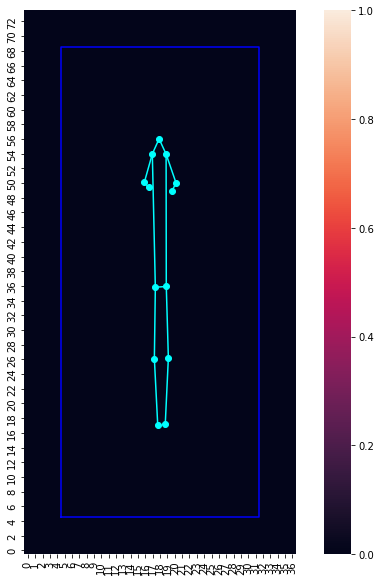

In [4]:
plt.gcf().set_size_inches(10, 10)
ax = plot_mattress(np.zeros((64, 27)), margin=5, border='blue', vmin=0, vmax=1)
plot_skeleton(net.skel, margin=5, show_z=False, show_labels=False, ax=ax)

In [5]:
SET = 'TEST'

In [6]:
def evaluate():
    global net, dm, X, y, y_hat
    dm.setup()
    val_data = next(iter(DataLoader(dm.test_set if SET == 'test' else dm.val_set, batch_size=len(dm.val_set))))
    X = val_data[0]
    y = val_data[1]
    y_hat = net(X).detach()

In [7]:
JOINT_REMAPPING = [12, 9, 8, 3, 2, 4, 1, 5, 0, 10, 7, 11, 6]
PART_REMAPPING = [2, 1, 3, 0, 6, 5, 7, 4]

In [8]:
def print_metrics():
    global y, y_hat
    pjpe = per_joint_position_errors(y_hat, y)
    print(f"Mean per-joint position error: {mpjpe(y_hat, y)} cm ± {torch.std(pjpe)} cm")
    print(f"PCP: {pcp(y_hat, y)*100} %")
    print(f"PCK: {pck(y_hat, y)*100} %")
    pjmpe = per_joint_mean_position_errors(y_hat, y)
    for index in range(constants.JOINTS):
        i = JOINT_REMAPPING[index]
        print(f"Mean position error for {constants.LABELS[i]}: {pjmpe[i]} cm ± {torch.std(pjpe[i])} cm")
    ppcp = per_part_correct_percentage(y_hat, y)
    for index in range(len(constants.PARTS)):
        i = PART_REMAPPING[index]
        print(f"Percentage of correct {constants.PARTS[i]}s: {ppcp[i]*100} %")
    pkcp = per_keypoint_correct_percentage(y_hat, y)
    for index in range(constants.JOINTS):
        i = JOINT_REMAPPING[index]
        print(f"Percentage of correct {constants.LABELS[i]}s: {pkcp[i]*100} %")

# Validation Dataset

In [9]:
dm = PressurePoseDataModule()
evaluate()

In [10]:
print_metrics()

Mean per-joint position error: 19.082925024031024 cm ± 11.338062825203496 cm
PCP: 33.1944465637207 %
PCK: 29.333332061767578 %
Mean position error for Thorax: 9.94975270952782 cm ± 6.260175438786541 cm
Mean position error for Left shoulder: 13.299089025363315 cm ± 6.574282608040741 cm
Mean position error for Right shoulder: 13.304492332150996 cm ± 6.125072330755431 cm
Mean position error for Left hip: 10.265846013890842 cm ± 4.237509084026064 cm
Mean position error for Right hip: 11.729931007112606 cm ± 4.748196435730977 cm
Mean position error for Left knee: 20.07207680682044 cm ± 12.441610605024481 cm
Mean position error for Right knee: 21.346941157604437 cm ± 11.617374528514674 cm
Mean position error for Left ankle: 20.485641526337552 cm ± 10.51892495715966 cm
Mean position error for Right ankle: 20.83542930469959 cm ± 9.95747014863791 cm
Mean position error for Left elbow: 22.97738476676092 cm ± 9.520850632097847 cm
Mean position error for Right elbow: 23.270230738091385 cm ± 9.1738

# Bodies-at-Rest Dataset

In [11]:
dm = BodiesAtRestDataModule(target_transform=SkeletonCleverToCommon())
evaluate()

In [12]:
print_metrics()

Mean per-joint position error: 28.987747000601917 cm ± 17.10306331320051 cm
PCP: 16.50969886779785 %
PCK: 14.049736022949219 %
Mean position error for Thorax: 19.587872667972928 cm ± 9.474128508244187 cm
Mean position error for Left shoulder: 20.647291998087436 cm ± 10.188506557883084 cm
Mean position error for Right shoulder: 20.870522163114426 cm ± 10.09868803441013 cm
Mean position error for Left hip: 16.649236516799494 cm ± 7.157098861116648 cm
Mean position error for Right hip: 16.68643581137451 cm ± 7.0369697337199 cm
Mean position error for Left knee: 24.410257540898375 cm ± 11.93363260238922 cm
Mean position error for Right knee: 24.28043874074584 cm ± 11.8188721865224 cm
Mean position error for Left ankle: 34.49063191190226 cm ± 16.507726669349257 cm
Mean position error for Right ankle: 34.302426652130784 cm ± 16.66291856321333 cm
Mean position error for Left elbow: 33.198915195177555 cm ± 14.60724084330865 cm
Mean position error for Right elbow: 32.892307207208475 cm ± 14.788

# SLP Dataset

In [13]:
dm = SLPDataModule(target_transform=SkeletonSLPToCommon())
evaluate()

In [14]:
print_metrics()

Mean per-joint position error: 19.082925024031024 cm ± 11.33806282520345 cm
PCP: 33.1944465637207 %
PCK: 29.333332061767578 %
Mean position error for Thorax: 9.949752709527818 cm ± 6.260175438786539 cm
Mean position error for Left shoulder: 13.299089025363315 cm ± 6.5742826080407495 cm
Mean position error for Right shoulder: 13.304492332150996 cm ± 6.1250723307554304 cm
Mean position error for Left hip: 10.265846013890842 cm ± 4.2375090840260645 cm
Mean position error for Right hip: 11.729931007112608 cm ± 4.7481964357309705 cm
Mean position error for Left knee: 20.07207680682044 cm ± 12.441610605024486 cm
Mean position error for Right knee: 21.346941157604434 cm ± 11.617374528514677 cm
Mean position error for Left ankle: 20.485641526337552 cm ± 10.51892495715966 cm
Mean position error for Right ankle: 20.83542930469959 cm ± 9.957470148637912 cm
Mean position error for Left elbow: 22.97738476676092 cm ± 9.520850632097837 cm
Mean position error for Right elbow: 23.27023073809139 cm ± 9.

# Softline dataset

In [15]:
dm = SoftlineDataModule()
evaluate()

In [16]:
print_metrics()

Mean per-joint position error: 18.647540607245872 cm ± 8.267374719568641 cm
PCP: 46.999996185302734 %
PCK: 19.69230842590332 %
Mean position error for Thorax: 12.66521519839407 cm ± 5.430345946691149 cm
Mean position error for Left shoulder: 16.58851504523234 cm ± 6.207970074616458 cm
Mean position error for Right shoulder: 15.719723274209732 cm ± 4.6777365169011995 cm
Mean position error for Left hip: 13.820175810171708 cm ± 3.710672980749075 cm
Mean position error for Right hip: 15.423669345036068 cm ± 3.380698612236207 cm
Mean position error for Left knee: 16.684314554618567 cm ± 5.653554762811356 cm
Mean position error for Right knee: 14.779543050312245 cm ± 4.861128264927041 cm
Mean position error for Left ankle: 26.900030558214027 cm ± 7.665925092128105 cm
Mean position error for Right ankle: 24.852674266635145 cm ± 9.162856095473314 cm
Mean position error for Left elbow: 20.727773018223935 cm ± 5.422627207155338 cm
Mean position error for Right elbow: 19.171602546132785 cm ± 5.3